# Regresión No Lineal Polinómica

Mateo Rosero

## Explicaciones Clave
**Sobre el dataset:** ``Ice_Cream_Selling_Data.csv`` contiene datos para determinar el número de ventas de helados dependiendo de la temperatura a la que se encuentre el día. Contiene las siguientes variables
-  Temperatura en grados Celsius --> Temperature (°C)
-  Venta de unidades de Helado --> Ice Cream Sales (Unit)

**Entrenamiento del modelo:** Se utilizará la librería de ``skearn`` para poder implementar algoritmos de Regresión Lineal y Regresión Polinomial.<br>
De igual manera, se evaluarán los grados a los que se eleva esta regresión para determinar el que mejor describa el comportamiento de los datos y así evitar el sobreajuste y subajuste.

# Importar Librerías Necesarias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importar el Dataset

In [2]:
dataset = pd.read_csv('Ice_Cream_Selling_Data.csv')

# Definición de Variable Independiente y Dependiente

In [3]:
X = dataset[['Temperature (°C)']].values  # Variable independiente
y = dataset['Ice Cream Sales (Unit)'].values  # Variable dependiente

En este contexto, las ventas de unidades de Helados cambiará dependiendo de la temperatura del día registrado, permitiendo realizar predicciones. Por esta razón, estas ventas son la variable dependiente y la temperatura diaria es la variable independiente, pues las ventas no influyen en qué temperatura hace en el día.

# Entrenamiento del modelo de Regresión Lineal

In [4]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

## Visualización de los resultados con Regresión Lineal

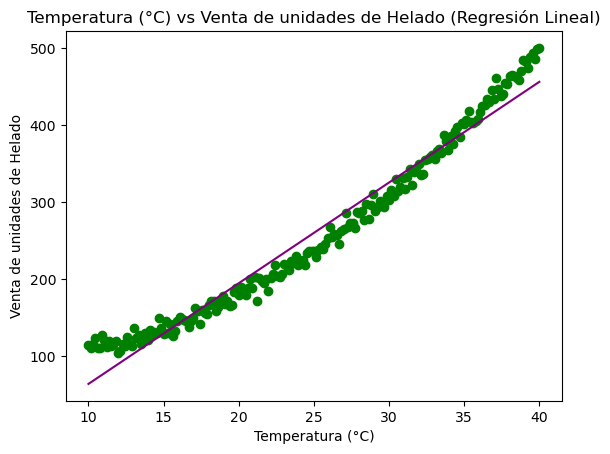

In [5]:
plt.scatter(X, y, color='green')
plt.plot(X, lin_reg.predict(X), color='purple')
plt.title('Temperatura (°C) vs Venta de unidades de Helado (Regresión Lineal)')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Venta de unidades de Helado')
plt.show()

Tal como se puede observar, una ~Regresión Lineal~ no puede explicar el comportamiento de los datos, pues estos tienen una tendencia curva. Por lo tanto, un modelo de **Regresión Polinómica** estaría _más ajustado_ a dicho comportamiento.

# Entrenamiento del modelo de Regresión Polinómica

In [6]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression()

## Visualización de los resultados con Regresión Polinómica (Grado 2)

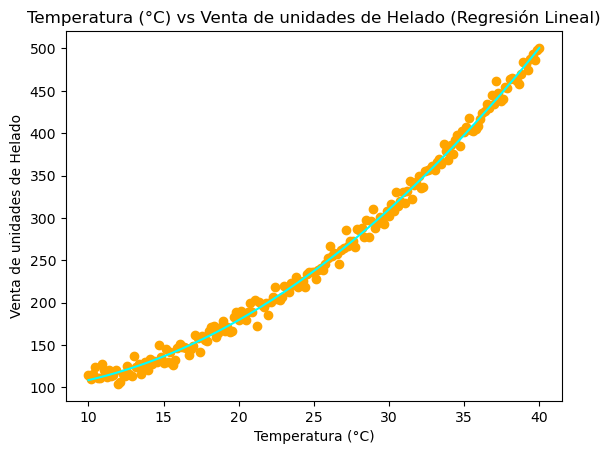

In [7]:
X_range = np.linspace(X.min(), X.max(), 199).reshape(-1, 1)
X_range_poly = poly_reg.transform(X_range)
y_pred = lin_reg_2.predict(X_range_poly)

plt.scatter(X, y, color='orange')
plt.plot(X_range, y_pred, color='cyan')
plt.title('Temperatura (°C) vs Venta de unidades de Helado (Regresión Lineal)')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Venta de unidades de Helado')
plt.show()

# Predicciones

## Regresión Lineal

In [8]:
print("Predicción Lineal para una Temperatura de 22 °C:", lin_reg.predict([[22]]))

Predicción Lineal para una Temperatura de 22 °C: [220.74239196]


## Regresión Polinómica

In [9]:
print("Predicción Polinómica para una Temperatura de 22 °C:", lin_reg_2.predict(poly_reg.transform([[22]])))

Predicción Polinómica para una Temperatura de 22 °C: [200.78944626]


# ANÁLISIS

In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import shapiro, normaltest
from statsmodels.stats.diagnostic import het_breuschpagan

# P-Valores

In [21]:
X_poly_sm = sm.add_constant(X_poly)
model = sm.OLS(y, X_poly_sm).fit()
p_values = model.pvalues

# Impresión con Notación Científica
print("P-valores:\n", p_values)

# Impresión sin Notación Científica
for i, p in enumerate(p_values):
    print(f"p-valor {i+1}: {p:.20f}")

P-valores:
 [9.36430680e-53 4.08326003e-06 6.80468788e-93]
p-valor 1: 0.00000000000000000000
p-valor 2: 0.00000408326003014975
p-valor 3: 0.00000000000000000000


En los P-Valores, el primer coeficiente es del intercepto, evaluando si la variable independiente, al tener un valor de 0, es significativa o no. <br>El segundo p-valor indica si la relación entre las dos variables a evaluar son significativas.<br>El tercer p-valor evalúa si esta relación no lineal es significativa.
- En este caso, al tener el primer p-valor un valor **0** cerrado, implica que esta variable es **_estadísticamente significativa_** e influyente en la variable dependiente.<br>
- Dentro del contexto, **este segundo valor es ínfimo, pero no un 0 cerrado**, indicando que esta **_relación entre las variables analizadas es significativa_**.
- El tercer valor, al ser **0**, igual refleja que **_la curvatura o efecto no lineal es importante para explicar la variable dependiente_**, es decir, las ventas de helados.

# R Cuadrado & R Cuadrado Ajustado

In [24]:
r_squared = model.rsquared
r_squared_adj = model.rsquared_adj

print(f"R²: {r_squared:.4f}")
print(f"R² ajustado: {r_squared_adj:.4f}")

R²: 0.9653
R² ajustado: 0.9651


Los resultados indican que el coeficiente de determinación, al ser un **valor cercano a 1 (_0.96_)**, indica que el modelo es un 96,5% acertado al predecir estos valores, por lo que se tiene un buen ajuste de modelo.

# MAE, MSE & RMSE

In [25]:
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)

print(f"MAE (Error Absoluto Medio): {mae:.4f}")
print(f"MSE (Error Cuadrático Medio): {mse:.4f}")
print(f"RMSE (Raíz del Error Cuadrático Medio): {rmse:.4f}")

MAE (Error Absoluto Medio): 5.8639
MSE (Error Cuadrático Medio): 54.8790
RMSE (Raíz del Error Cuadrático Medio): 7.4080


Estos errores que miden la precisión del modelo, indican lo siguiente:
1. **Error Absoluto Medio (MAE) -->** En promedio, el modelo se equivoca por 5.86 ventas.
2. **Error Cuadrático Medio (MSE) -->** Existen errores con valores altos que son penalizados más fuertemente, pero no son dominantes en el modelo, por lo que no se pierde la precisión.
3. **Raíz del Error Cuadrático Medio (RMSE) -->** Refleja una variabilidad general de los errores, pero contiene un valor bajo (7.40) al momento de equivocarse.<br>
El presente análisis establece que los valores de **errores** son **muy bajos en comparación con los valores de venta promedio**, lo cual apunta a que el **_modelo predice con precisión_**.

# Normalidad de los Residuos

In [26]:
# Calculo de los Residuos
residuos = y - y_pred

C:\Users\mateo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


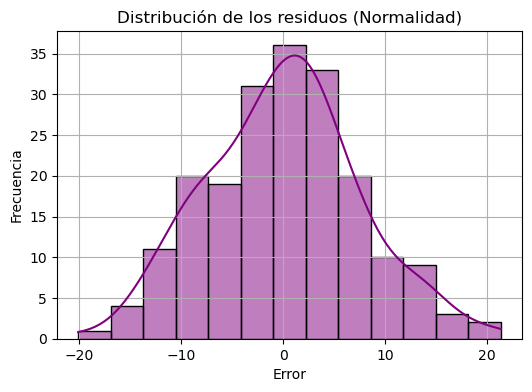

In [27]:
# Visualización en Histograma
plt.figure(figsize=(6, 4))
sns.histplot(residuos, kde=True, color='purple')
plt.title("Distribución de los residuos (Normalidad)")
plt.xlabel("Error")
plt.ylabel("Frecuencia")
plt.grid()
plt.show()

Por lo pronto, la distribución de errores gráficamente demuestra que tiene una forma de _Campana de Gauss_, con una curva que destaca una **_distribución normal y mesocúrtica_**. <br>
En pocas palabras, la normalidad de los residuos indica que el **modelo tiene un buen ajuste**.

## Prueba Shapiro-Wilk

In [28]:
stat, p_shapiro = shapiro(residuos)
print(f"Shapiro-Wilk Test: W={stat:.4f}, p-value={p_shapiro:.4f}")

Shapiro-Wilk Test: W=0.9948, p-value=0.7168


Esta prueba evalúa estadísticamente si los residuos o errores del modelo siguen una distribución normal, en el que el **valor de W** (estadística de la prueba), al ser **cercano a 1**, indica que se **ajusta bien a la normalidad**; además, el _p-valor_ establecido de este test es _mayor a 0.05_, concluyendo que _no rechaza la hipótesis nula de normalidad_.<br>
Lo anterior indica que los residuos tienen una **_distribución normal aceptable_**. 

# Homocedasticidad

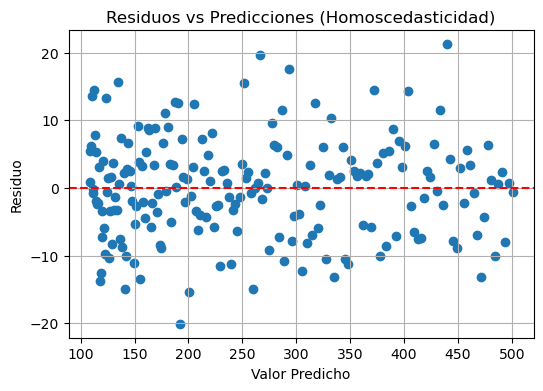

In [29]:
plt.figure(figsize=(6, 4))
plt.scatter(y_pred, residuos)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residuos vs Predicciones (Homoscedasticidad)")
plt.xlabel("Valor Predicho")
plt.ylabel("Residuo")
plt.grid()
plt.show()

A nivel gráfico, el **patrón** que se forma entre los residuos y valores predichos es **aleatorio**, por lo que la dispersión de los valores es constante. Esto significa que el error tiene una **_varianza constante_**.

## Prueba de Breusch-Pagan

In [30]:
X_sm = sm.add_constant(X_poly)
bp_test = het_breuschpagan(residuos, X_sm)

labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
results = dict(zip(labels, bp_test))

print("\nPrueba de Breusch-Pagan para Homocedasticidad:")
for key, val in results.items():
    print(f"{key}: {val:.4f}")


Prueba de Breusch-Pagan para Homocedasticidad:
Lagrange multiplier statistic: 0.2498
p-value: 0.8826
f-value: 0.1232
f p-value: 0.8842


Dentro de este análisis se resalta la importancia del **p-valor** calculado con este test.
- Al ser **mayor que 0.05 (_0.88_)**, indica que _no se rechaza la hipótesis nula de homocedasticidad_, es decir, que hay una **_varianza constante entre los errores_**, tal como se observó en el gráfico anterior.

# CONCLUSIONES

En conclusión, al principio se escogió a la columna _Temperatura_ como variable independiente y a _Ventas de Helados_ como variale dependiente, pues el aumento o disminución de la temperatura del día influye o impacta en la cantidad de helados que se venden en ese periodo de tiempo. Posteriormente, desde que se realizó un gráfico de la distribución de los datos entre estas dos variables se pudo observar que esta tenía un comportamiento no lineal, por lo que se decidió utilizar una Regresión Polinómica.<br> 
Tras un análisis técnico y estadístico se demostró lo siguiente:
- El **grado del polinomio debía ser 2**, gracias a que, en un análisis de P-Valores, se encontró que el tercero de estos (el que indica la relación no lineal de las variables) tenía un valor sumamente cercano a 0 (6.80468788e-93). De igual forma, los otros dos P-Valores (9.36430680e-53 & 4.08326003e-06) estipulaban que las variables estaban estrechamente relacionadas y que aquella que era independiente (_Temperatura_) era muy significativa para la dependiente (_Ventas de Helado_). Por último, se escogió este grado para **_evitar un sobreajuste en el modelo_**, el cual suele ocurrir con modelos de regresión polinómicos de grado superior.
- El **modelo tenía un alto porcentaje de acierto en sus predicciones**, un **_96.5% para ser exactos_**, por su análisis de coeficientes de determinación (R Cuadrado), tanto el normal como el ajustado, el cual evalúa la inclusión de variables innecesarias en el modelo (en este caso, los valores serían similares debido a que solo se usan 2 variables).
- Los **errores del modelo son muy bajos** en comparación de sus valores reales de ventas, pues el error absoluto medio tenía 5.86, el error cuadrático medio tenía 54.87, y su raíz 7.41, estableciendo así que el _**modelo predice los valores con alta precisión y, por ende, con poco margen de error**_.
- La **normalidad del modelo se cumplía**, tanto gráfica como estadísticamente, pues tenía una _curvatura mesocúrtica_, similar a una _Campana de Gauss_, con un **_P-Valor (0.72) mucho mayor a 0.05_**, que es el estándar, denotanto que se _ajusta bien a la normalidad_.
- Gráficamente, la **homocedasticidad se cumple en este modelo** gracias a que se observaron _patrones aleatorios_ en la distribución entre residuos y valores predichos; por otro lado, estadísticamente se obtuvo un **P-Valor de 0.88, superando con creces al estándar, que era de 0.05 o mayor**, demostrando que existe una **_varianza constante entre los errores del modelo_**. <br>
Todo lo anterior evidencia que el **_Modelo de Regresión Polinómica_** es el adecuado para este escenario, en el que, a medida que la _Temperatura del día aumenta, mayor es la cantidad de helados vendidos_.